Locked: 7.49 Mw, 2.18e+20 M0


C:\Users\jmc753\AppData\Local\Temp\ipykernel_8124\3598602458.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Mw_bins, np.log10(N), label=f'Mw_max={Mw_max:.2f}, b={b}', linestyle=linestyles[ix])
C:\Users\jmc753\AppData\Local\Temp\ipykernel_8124\3598602458.py:30: RuntimeWarning: invalid value encountered in log10
  plt.plot(Mw_bins, np.log10(N), label=f'Mw_max={Mw_max:.2f}, b={b}', linestyle=linestyles[ix])


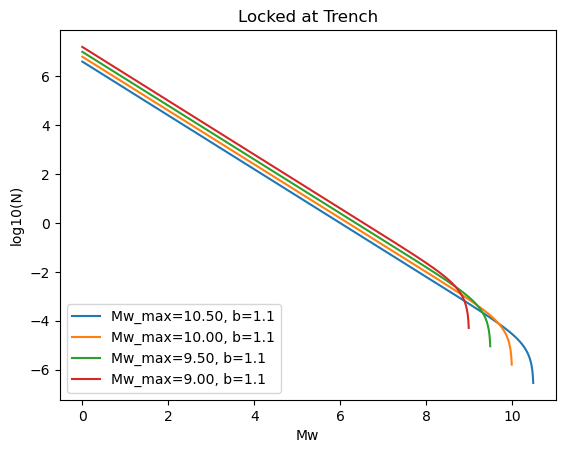

In [34]:
import matplotlib.pyplot as plt
import numpy as np


def mw2mo(Mw):
    return 10 ** ((3 * Mw) / 2 + 9.1)

def mo2mw(M0):
    return (2 / 3) * (np.log10(M0) - 9.1)

alpha_s = 1
mu = 3e10
a = 5000 * 5000 * 14767
av_slip = 19.64671 * 1e-3
mo_rate = mu * a * av_slip
b_values = [0.95, 1.1, 1.24]
b_values = [1.1]
Mw_max_array = np.arange(9.0, 11, 0.5)[::-1]

Mw_bins = np.arange(0, np.max([Mw_max_array.max(), 9.5]), 0.01)
M0_bins = mw2mo(Mw_bins)
print(f"Locked: {mo2mw(mo_rate):.2f} Mw, {mo_rate:.2e} M0")

linestyles = ['-', '--', ':']
for Mw_max in Mw_max_array:
    for ix, b in enumerate(b_values):
        M0_max = mw2mo(Mw_max)
        N = ((1 - ((2 * b) / 3)) / ((2*b) / 3)) * ((alpha_s * mo_rate) / M0_max) * ((M0_max / M0_bins) ** ((2*b) / 3) - 1)

        plt.plot(Mw_bins, np.log10(N), label=f'Mw_max={Mw_max:.2f}, b={b}', linestyle=linestyles[ix])
plt.legend(loc='lower left')
plt.xlabel('Mw')
plt.ylabel('log10(N)')
# plt.ylim(2, 10)
plt.title('Locked at Trench')
plt.show()

In [35]:
av_slip_creep = 18.13323 * 1e-3
slip_diff = av_slip - av_slip_creep
diff_M0 = mu * a * slip_diff
print(mo2mw(diff_M0))
print(slip_diff)

6.7495534830557995
0.0015134799999999976


Creeping Difference: 6.75 Mw, 1.68e+19 M0
Creeping: 7.47 Mw, 2.01e+20 M0


C:\Users\jmc753\AppData\Local\Temp\ipykernel_8124\1027795259.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Mw_bins, np.log10(N), label=f'Mw_max={Mw_max:.2f}, b={b}', linestyle=linestyles[ix])
C:\Users\jmc753\AppData\Local\Temp\ipykernel_8124\1027795259.py:13: RuntimeWarning: invalid value encountered in log10
  plt.plot(Mw_bins, np.log10(N), label=f'Mw_max={Mw_max:.2f}, b={b}', linestyle=linestyles[ix])


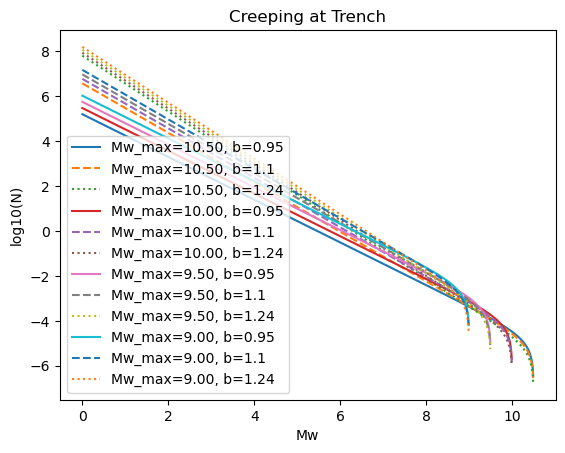

In [36]:
slip_diff = 3.42155 * 1e-3
diff_M0 = mu * slip_diff * 5000 * 5000 * 6532
print(f"Creeping Difference: {mo2mw(diff_M0):.2f} Mw, {diff_M0:.2e} M0")
mo_rate -= diff_M0
print(f"Creeping: {mo2mw(mo_rate):.2f} Mw, {mo_rate:.2e} M0")

for Mw_max in Mw_max_array:
    for ix, b in enumerate([0.95, 1.1, 1.24]):

        M0_max = mw2mo(Mw_max)
        N = ((1 - ((2 * b) / 3)) / ((2*b) / 3)) * ((alpha_s * mo_rate) / M0_max) * ((M0_max / M0_bins) ** ((2*b) / 3) - 1)

        plt.plot(Mw_bins, np.log10(N), label=f'Mw_max={Mw_max:.2f}, b={b}', linestyle=linestyles[ix])
plt.legend(loc='lower left')
plt.xlabel('Mw')
plt.ylabel('log10(N)')
# plt.ylim(2, 10)
plt.title('Creeping at Trench')
plt.show()

In [37]:
# Calculate moment rate from Chris's work
bvalue, n5 = 1.1, 21.5
mw_max = 9.5
a = (2 * bvalue) / 3

moment_rate = n5 * (a/(1-a)) * (1 / ((mw2mo(mw_max)/mw2mo(5))**a - 1)) * (mw2mo(mw_max))
print(f"Moment Rate from Chris's work: {moment_rate:.2e} M0")

M0_max = mw2mo(5) / (1 - ((n5 * a * mw2mo(5))/((1 - a) * mo_rate)))
print(f"Max Moment from Chris's work: {M0_max:.2e} M0, {mo2mw(M0_max):.2f} Mw")

Moment Rate from Chris's work: 1.49e+20 M0
Max Moment from Chris's work: 4.03e+16 M0, 5.00 Mw


C:\Users\jmc753\AppData\Local\Temp\ipykernel_8124\2527888847.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Mw_bins, np.log10(N), label=f'Mo Scaling 1/{redux}, {new_mo_rate:.2e}Mo')
C:\Users\jmc753\AppData\Local\Temp\ipykernel_8124\2527888847.py:8: RuntimeWarning: invalid value encountered in log10
  plt.plot(Mw_bins, np.log10(N), label=f'Mo Scaling 1/{redux}, {new_mo_rate:.2e}Mo')


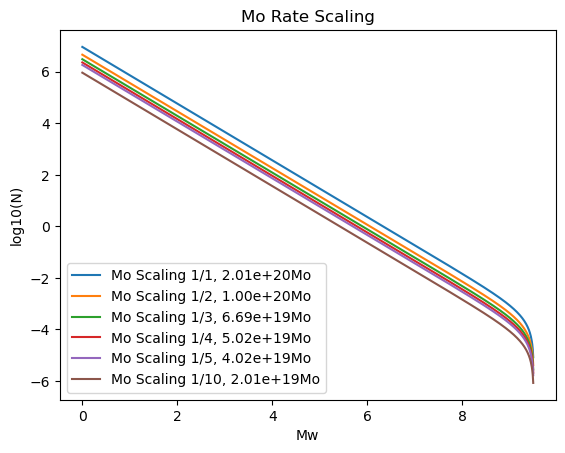

In [38]:
for Mw_max in [9.5]:
    for b in [1.1]:
        for redux in [1, 2, 3, 4, 5, 10]:
            new_mo_rate = mo_rate / redux
            M0_max = mw2mo(Mw_max)
            N = ((1 - ((2 * b) / 3)) / ((2*b) / 3)) * ((alpha_s * new_mo_rate) / M0_max) * ((M0_max / M0_bins) ** ((2*b) / 3) - 1)

            plt.plot(Mw_bins, np.log10(N), label=f'Mo Scaling 1/{redux}, {new_mo_rate:.2e}Mo')
plt.legend(loc='lower left')
plt.xlabel('Mw')
plt.ylabel('log10(N)')
# plt.ylim(2, 10)
plt.title('Mo Rate Scaling')
plt.show()